In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_data = pd.read_csv('../../data/drug_sensitivity_lung_CellBlind_test&prediction.csv')
df_data.head()

,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
0,0,5-Fluorouracil,OPM2,3.454205,PCM,3.180841
1,1,5-azacytidine,OPM2,1.412405,PCM,2.575887
2,2,A-366,OPM2,3.899873,PCM,3.786826
3,3,ABT737,OPM2,1.208203,PCM,-2.233765
4,4,AGI-5198,OPM2,3.522023,PCM,3.753544


In [9]:
# 按照drug分组，计算每组IC50与prediction的皮尔逊相关系数
df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))

drug
5-Fluorouracil       0.379138
5-azacytidine        0.448842
A-366                0.477626
ABT737               0.768198
AGI-5198             0.473789
                       ...   
YK-4-279             0.465631
ZM447439             0.519156
Zoledronate          0.648917
alpha-lipoic acid    0.491181
glutathione          0.419290
Length: 233, dtype: float64

In [10]:
drugs_corr = df_data.groupby('drug')[['IC50', 'prediction']].apply(lambda x: x['IC50'].corr(x['prediction']))
drugs_corr = drugs_corr.reset_index()
drugs_corr.columns = ['drug', 'corr']
drugs_corr.head()

,drug,corr
0,5-Fluorouracil,0.379138
1,5-azacytidine,0.448842
2,A-366,0.477626
3,ABT737,0.768198
4,AGI-5198,0.473789


In [11]:
# 画图：按照相关系数排序，画出每个drug的相关系数，从大到小，前15个使用红色，其他用蓝色
drugs_corr = drugs_corr.sort_values(by='corr', ascending=False)
# 重置索引
drugs_corr = drugs_corr.reset_index(drop=True)

In [14]:
drugs_corr['color'] = 'blue'
drugs_corr.loc[drugs_corr.index < 15, 'color'] = 'red'

drugs_corr.head()

,drug,corr,color
0,Nelarabine,0.850122,red
1,IOX2,0.780859,red
2,ABT737,0.768198,red
3,Dabrafenib,0.766089,red
4,Navitoclax,0.750040,red


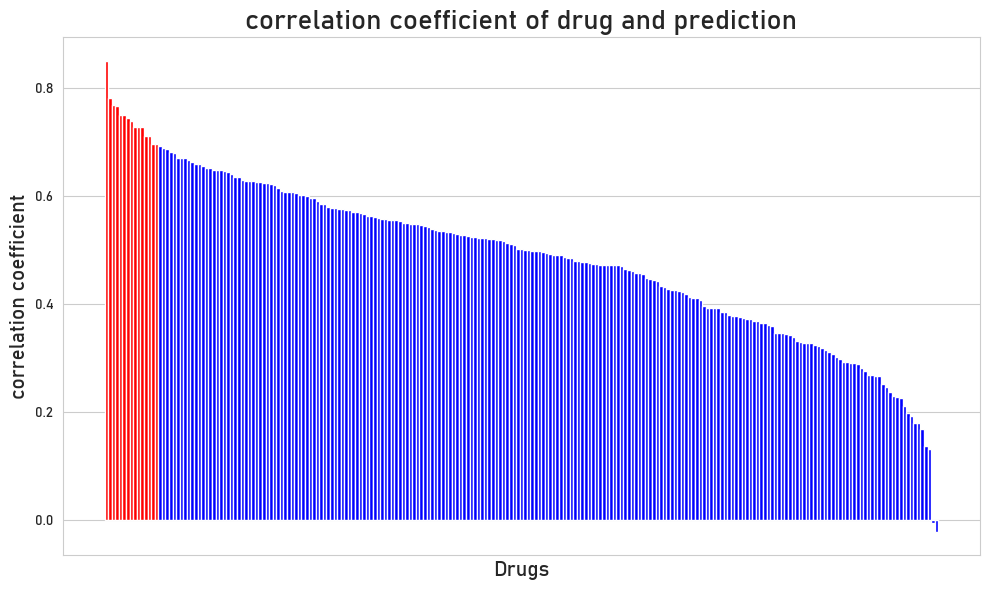

In [34]:
# 画图
plt.figure(figsize=(10, 6))
plt.bar(x=drugs_corr.index, height=drugs_corr['corr'], color=drugs_corr['color'],width=1)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取消X轴展示
plt.xticks([])
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=15)

plt.ylabel('correlation coefficient', fontsize=15)
plt.title('correlation coefficient of drug and prediction', fontsize=20)
plt.tight_layout()
# plt.savefig('all.png', dpi=300)
plt.show()

In [28]:
# 取前15个数据
drugs_corr_top15 = drugs_corr.loc[drugs_corr.index < 15, :]
drugs_corr_top15.head()

,drug,corr,color
0,Nelarabine,0.850122,red
1,IOX2,0.780859,red
2,ABT737,0.768198,red
3,Dabrafenib,0.766089,red
4,Navitoclax,0.750040,red


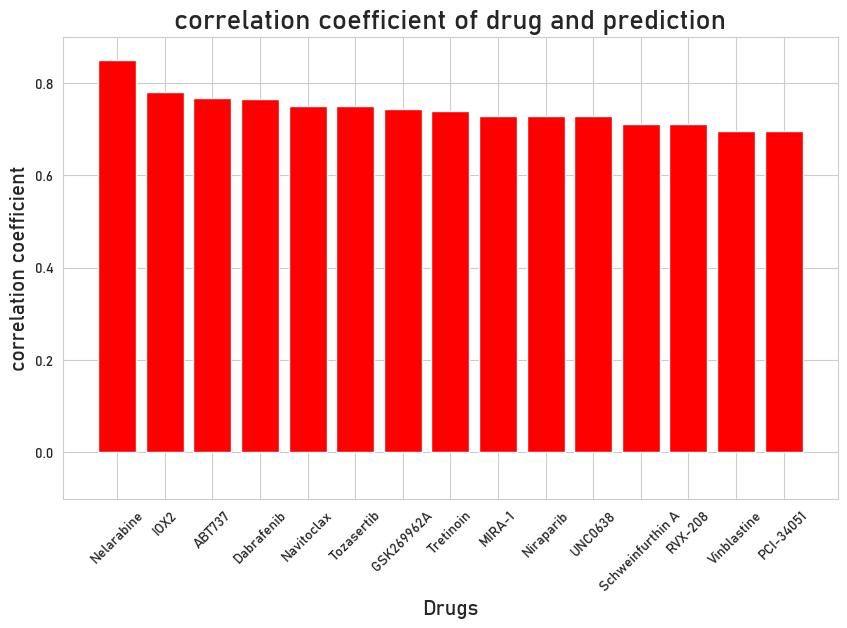

In [30]:

plt.figure(figsize=(10, 6))
plt.bar(x=drugs_corr_top15['drug'], height=drugs_corr_top15['corr'], color=drugs_corr_top15['color'])
# X轴 旋转45度
plt.xticks(drugs_corr_top15['drug'], rotation=45)
# 规定Y轴范围
# plt.ylim(-0.1, 0.9)
# plt.xticks(drugs_corr.index, drugs_corr['drug'], rotation=90)
plt.xlabel('Drugs', fontsize=15)

plt.ylabel('correlation coefficient', fontsize=15)
plt.title('correlation coefficient of drug and prediction', fontsize=20)
plt.tight_layout()
# plt.savefig('top15.png', dpi=300)

plt.show()